<a href="https://colab.research.google.com/github/w4bo/2022-bbs-dm/blob/main/notebooks/01-PandasFundaments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing

Pandas is the shorthand for 'Python and Data Analysis'. It provides a rich set of features for exploring and manipulating data, making it the go-to toolkit for a lot of data scientists.

Check also: https://pandas.pydata.org/

In case you need help with Python fundametals, check:
- https://github.com/w4bo/2022-bbs-dm/blob/main/notebooks/00-PythonFundamentals.ipynb
- https://learnxinyminutes.com/docs/python/

In [1]:
import numpy as np
import pandas as pd
print(pd.__version__)


1.5.1


Creating some pandas series...

In [2]:
ser_a = pd.Series([1, 2, 3, 4], index=["a", "b", "c", "d"])
ser_b = pd.Series([1, 2, 3, 4], index=["b", "a", "c", "d"])

ser_a + ser_b


a    3
b    3
c    6
d    8
dtype: int64

... doing some element-wise operations

In [3]:
ser_a + ser_b
ser_a - ser_b
ser_a * ser_b
ser_a / ser_b


a    0.5
b    2.0
c    1.0
d    1.0
dtype: float64

... doing some aggregation 

In [4]:
ser_c = pd.Series([1, np.nan, 3, 4], index=["a", "b", "c", "d"])
print(ser_c.dtype)               # Which dtype has `ser_c`?

ser_c.count()             # => 3
ser_c.sum()               # => 8
ser_c.mean()              # => 2.67
ser_c.mean(skipna=False)  # => nan
ser_c.max()               # => 4
ser_c.min()               # => 1
ser_c.idxmax()            # => "d"

ser_d = pd.Series([1, "a", 3, 4], index=["a", "b", "c", "d"])
print(ser_d.dtype)        # which dtype has `ser_d`?

ser_e = pd.Series([1, 1, 1, np.nan, 3, 4])
ser_e


float64
object


0    1.0
1    1.0
2    1.0
3    NaN
4    3.0
5    4.0
dtype: float64

Cheking unique values

In [5]:
ser_e.unique()  # => [ 1., nan,  3.,  4.]
ser_e.nunique()  # => 3
ser_e.value_counts()


1.0    3
3.0    1
4.0    1
dtype: int64

<AxesSubplot: >

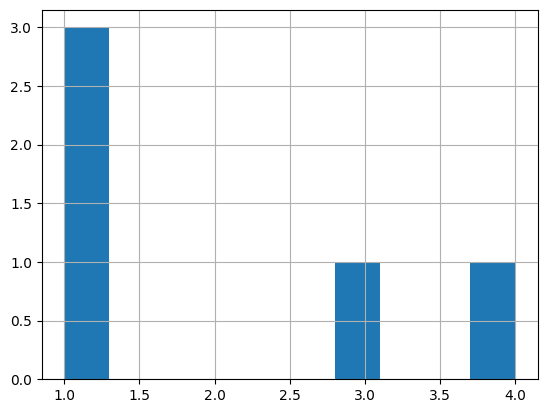

In [6]:
ser_e.hist(bins=10)


Checking null values

In [7]:
df = pd.DataFrame()  # create an empty dataframe
df["ser_e"] = ser_e  # add the column "ser_e"
df["isna"] = ser_e.isna()  # add the column "isna", True if the value is NaN
df["notna"] = ser_e.notna()  # add the column "notna", False if the value is NaN
df


,ser_e,isna,notna
0,1.0,False,True
1,1.0,False,True
2,1.0,False,True
3,NaN,True,False
4,3.0,False,True
5,4.0,False,True


In [8]:
ser_e.mean()  # the mean is 2
# fill the missing value with the average
df["mean"] = ser_e.fillna(ser_e.mean())
df


,ser_e,isna,notna,mean
0,1.0,False,True,1.0
1,1.0,False,True,1.0
2,1.0,False,True,1.0
3,NaN,True,False,2.0
4,3.0,False,True,3.0
5,4.0,False,True,4.0


In [9]:
# fill the missing value with the previous (not NaN) value
df["ffill"] = ser_e.fillna(method="ffill")
df


,ser_e,isna,notna,mean,ffill
0,1.0,False,True,1.0,1.0
1,1.0,False,True,1.0,1.0
2,1.0,False,True,1.0,1.0
3,NaN,True,False,2.0,1.0
4,3.0,False,True,3.0,3.0
5,4.0,False,True,4.0,4.0


In [10]:
# fill the missing value with the following (not NaN) value
df["bfill"] = ser_e.fillna(method="bfill")
df


,ser_e,isna,notna,mean,ffill,bfill
0,1.0,False,True,1.0,1.0,1.0
1,1.0,False,True,1.0,1.0,1.0
2,1.0,False,True,1.0,1.0,1.0
3,NaN,True,False,2.0,1.0,3.0
4,3.0,False,True,3.0,3.0,3.0
5,4.0,False,True,4.0,4.0,4.0


In [11]:
ser_e.dropna()


0    1.0
1    1.0
2    1.0
4    3.0
5    4.0
dtype: float64

Creating pandas dataframes

In [12]:
# create a dataframe with random data
import random
random.seed(3)
df = pd.DataFrame([[random.randint(0, 9) for i in range(10)] for i in range(5)],
                  index=[i for i in range(5)],
                  columns=list('abcdefghij'))
df


,a,b,c,d,e,f,g,h,i,j
0,3,9,8,2,5,9,7,9,1,9
1,0,7,4,8,3,3,7,8,8,7
2,6,2,3,2,8,6,0,1,2,9
3,0,4,0,4,7,9,6,6,6,9
4,7,2,5,1,0,2,7,3,4,6


Doing some operations with pandas dataframes

In [13]:
# Select a column (i.e., a series)
df['a']

# Add another column
df['k'] = df['a'] * df['b']

# Get the headers (i.e., the column names)
df.columns

# Get just the first two rows
df.head(2)

# Get just the last two rows
df.tail(2)

# Sort the dataframe by columns
df.sort_values(by=['a', 'b'], ascending=[False, True])

# To get some statistics (e.g., count, mean, std, min, etc.)
df.describe()


,a,b,c,d,e,f,g,h,i,j,k
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000
mean,3.200000,4.800000,4.000000,3.400000,4.600000,5.800000,5.40000,5.400000,4.200000,8.000000,10.600000
std,3.271085,3.114482,2.915476,2.792848,3.209361,3.271085,3.04959,3.361547,2.863564,1.414214,11.260551
min,0.000000,2.000000,0.000000,1.000000,0.000000,2.000000,0.00000,1.000000,1.000000,6.000000,0.000000
25%,0.000000,2.000000,3.000000,2.000000,3.000000,3.000000,6.00000,3.000000,2.000000,7.000000,0.000000
50%,3.000000,4.000000,4.000000,2.000000,5.000000,6.000000,7.00000,6.000000,4.000000,9.000000,12.000000
75%,6.000000,7.000000,5.000000,4.000000,7.000000,9.000000,7.00000,8.000000,6.000000,9.000000,14.000000
max,7.000000,9.000000,8.000000,8.000000,8.000000,9.000000,7.00000,9.000000,8.000000,9.000000,27.000000


Why is the `mean` around 4.0 and 5.0?